In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
from sklearn.datasets import load_files

In [2]:
#The path of our data on drive
data_dir =  r'C:\Users\vinot\My ML Projects\Medicinal Plants Classifcation\dataset1'
 
#Loading our Data
data = load_files(data_dir)

In [3]:
folders=os.listdir(r"C:\Users\vinot\My ML Projects\Medicinal Plants Classifcation\dataset1")
print(folders)

['Abelmoschus moschatus medik(Ambrette )', 'Aloe vera (L.) Burm.F(Aloe Vera)', 'Hibiscus rosasinensis(Red Hibiscus)', 'Kaempferia Galanga(Aromatic ginger)', 'Kalanchoe Pinnata (Lam.) Pers(Miracle leaf)', 'Lasia Spinosa (L.) Thwaites(Lesia)', 'Lawsonia inermis L.(Henna)', 'Leucas aspera Link(Thumba)', 'Mentha arvensis L(Corn Mint)', 'Mesua ferrea L.(Nagakesar)', 'Mimusops elengi L.(Spanish cherry)', 'Nyctanthes arbor-Tristis L.(Night Blooming Jasmine)', 'Psidium guajava L.(Guava Seed)', 'Rauvolfia serpentina Benth. Ex Kurz(Serpentine root)', 'Rotheca serrata (L.) Steane & Mabb.(Clerodendrum, Bharangi)', 'Vanilla planifolia(Flat-leaved vanilla)', 'Vitex negundo L.(Chinese Chaste Tree)', 'Zanthoxylum nitidum DC.(Shiny-leaf prickly-ash)', 'Zingiber officinale Rosc.(Ginger rhizome)', 'Ziziphus Jujuba Mill.(Jujube)']


In [4]:
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])
x_tr=97
x_ts=1
print('Data files - ',X)
print('Target labels - ',y)

Data files -  ['C:\\Users\\vinot\\My ML Projects\\Medicinal Plants Classifcation\\dataset1\\Kaempferia Galanga(Aromatic ginger)\\frame324.jpg'
 'C:\\Users\\vinot\\My ML Projects\\Medicinal Plants Classifcation\\dataset1\\Mimusops elengi L.(Spanish cherry)\\frame201.jpg'
 'C:\\Users\\vinot\\My ML Projects\\Medicinal Plants Classifcation\\dataset1\\Vanilla planifolia(Flat-leaved vanilla)\\frame93.jpg'
 ...
 'C:\\Users\\vinot\\My ML Projects\\Medicinal Plants Classifcation\\dataset1\\Mesua ferrea L.(Nagakesar)\\frame179.jpg'
 'C:\\Users\\vinot\\My ML Projects\\Medicinal Plants Classifcation\\dataset1\\Lasia Spinosa (L.) Thwaites(Lesia)\\frame43.jpg'
 'C:\\Users\\vinot\\My ML Projects\\Medicinal Plants Classifcation\\dataset1\\Lasia Spinosa (L.) Thwaites(Lesia)\\_491.jpg']
Target labels -  [ 3 10 15 ...  9  5  5]


In [5]:
print('Number of training files : ', X.shape[0])
print('Number of training targets : ', y.shape[0])

Number of training files :  9377
Number of training targets :  9377


In [6]:
from keras.preprocessing.image import img_to_array, load_img

def convert_img_to_arr(file_path_list):
    arr = []
    #size=64,64
    img_width, img_height = 150,150
    for file_path in file_path_list:
        img = load_img(file_path, target_size = (img_width, img_height))
        img = img_to_array(img)
        arr.append(img)
        #arr.append(cv2.resize(img,size))
    return arr
 
X = np.array(convert_img_to_arr(X))
print(X.shape) 
print('First training item : ',X[0])

(9377, 150, 150, 3)
First training item :  [[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


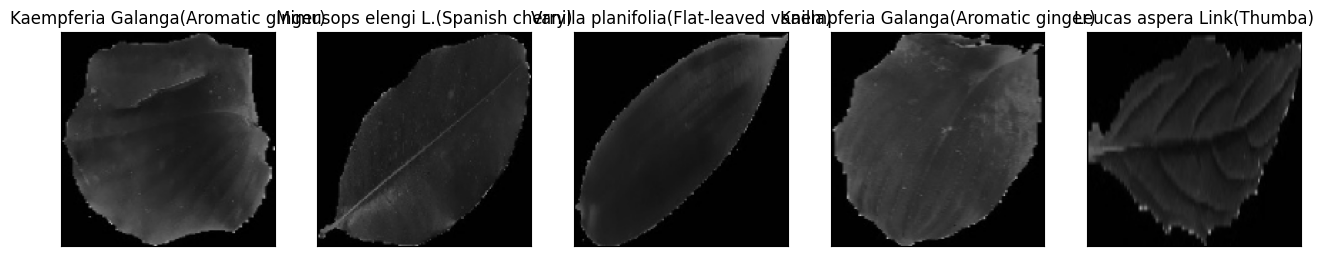

In [7]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (16,9))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
    ax.imshow((X[i].astype(np.uint8)))
    plt.title(folders[y[i]])
    

In [8]:
# Let's resize or rescale training data
X = X.astype('float32')/255
 
# Let's confirm the number of classes :) 
no_of_classes = len(np.unique(y))
no_of_classes

20

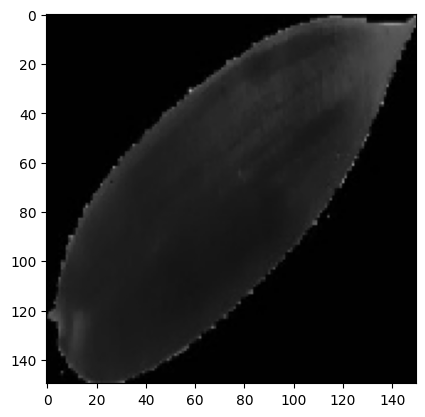

3

In [9]:
plt.imshow(X[2])
plt.show()
y[0]

In [10]:
y[55]


18

In [11]:

from tensorflow.python.keras.utils import np_utils

# let's converts a class vector (integers) to binary class matrix.
y = np_utils.to_categorical(y-1,no_of_classes)
y[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [12]:
from sklearn.model_selection import train_test_split

# let's splite the data into subsets and explore their shapes !

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('The test Data Shape ', X_test.shape[0])
 
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size = 0.5)
print('The training Data Shape ', X_valid.shape[0])

The test Data Shape  1876
The training Data Shape  938


In [13]:
print('The train Data Shape ', X_train.shape[1:])
import tensorflow as tf

The train Data Shape  (150, 150, 3)


In [16]:
len(X_valid)

938

In [15]:
len(y_train)

7501

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [17]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', input_shape=X_train.shape[1:], activation='relu', name='Conv2D_1'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='Conv2D_2'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_1'))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_3'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', name='Conv2D_4'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_2'))
model.add(Dropout(0.5))
    
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_5'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', name='Conv2D_6'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_3'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=512, activation='relu', name='Dense_1'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu', name='Dense_2'))
model.add(Dense(units=128, activation='relu', name='Dense_3'))
model.add(Dense(units=128, activation='relu', name='Dense_4'))

model.add(Dense(units=no_of_classes, activation='softmax', name='Output'))

C:\Users\vinot\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
from keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\vinot\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
import time
from keras.callbacks import ModelCheckpoint, EarlyStopping
 
# Time to train our model !
epochs = 100
batch_size=128
 
train_datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True)
 
test_datagen = ImageDataGenerator()
 
train_generator = train_datagen.flow(
    X_train,y_train,
    batch_size=batch_size)
 
validation_generator = test_datagen.flow(
    X_valid,y_valid,
    batch_size=batch_size)
 
checkpointer = ModelCheckpoint(filepath = r"C:\Users\vinot\My ML Projects\Medicinal Plants Classifcation\mediplant.keras", save_best_only = True, verbose = 1)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose = 1, factor = 0.5, minlr = 0.00001)
 

start = time.time()
 
# let's get started !
 
history=model.fit(train_generator,
                            epochs=epochs,
                            validation_data = validation_generator,
                            verbose=1,
                            steps_per_epoch=len(X_train) // batch_size,
                            #validation_steps=len(X_valid) //batch_size,
                            # callbacks=[checkpointer, learning_rate_reduction]
                 )
 
end = time.time()
 
duration = end - start
(eval_loss, eval_accuracy) = model.evaluate(  
     X_test, y_test, batch_size=16, verbose=2)
print ('\n This Model took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )


Epoch 1/100


C:\Users\vinot\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 970s 17s/step - accuracy: 0.1012 - loss: 3.1775 - val_accuracy: 0.1077 - val_loss: 2.9469
Epoch 2/100
 1/58 ━━━━━━━━━━━━━━━━━━━━ 15:49 17s/step - accuracy: 0.1172 - loss: 2.9424

C:\Users\vinot\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


58/58 ━━━━━━━━━━━━━━━━━━━━ 53s 638ms/step - accuracy: 0.1172 - loss: 1.4966 - val_accuracy: 0.1077 - val_loss: 2.9277
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 977s 17s/step - accuracy: 0.1346 - loss: 2.9023 - val_accuracy: 0.2399 - val_loss: 2.3111
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 539ms/step - accuracy: 0.3047 - loss: 1.1491 - val_accuracy: 0.3475 - val_loss: 1.9721
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2634s 46s/step - accuracy: 0.2982 - loss: 2.0923 - val_accuracy: 0.3806 - val_loss: 1.8458
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 44s 526ms/step - accuracy: 0.2422 - loss: 1.2256 - val_accuracy: 0.5011 - val_loss: 1.7915
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 908s 16s/step - accuracy: 0.4465 - loss: 1.6308 - val_accuracy: 0.7356 - val_loss: 0.7220
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 556ms/step - accuracy: 0.6328 - loss: 0.5614 - val_accuracy: 0.6855 - val_loss: 0.9253
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1142s 20s/step - accuracy: 0.6023 - loss: 1.1849 - val_accuracy: 

In [ ]:
print("Accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("Loss: {}".format(eval_loss))

In [ ]:
print('The train Data Shape ', X_test.shape[1:])
x = np.asarray(X_valid)
images = np.vstack([x])
classes = model.predict(images)
print('Predicted class is :')
print((classes))

In [ ]:
y_pred = model.predict(X_valid)

In [ ]:
# Finding max value from predition list and comaparing original value vs predicted
from sklearn.metrics import confusion_matrix
print("Originally : ", folders[np.argmax(y_valid[11])])
print("Predicted : ", folders[np.argmax(classes[11])])
print(max(y_pred[11]))


In [ ]:
plt.imshow(X_valid[11])
plt.show()

y_pred[11]

In [ ]:
for i in range(500):
    print (folders[np.argmax(y_test[i])], " ", folders[np.argmax(classes [1])])

In [ ]:
# from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_train)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_train,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']

epochs = range(1,11)

plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Testing Accuracy') # validation accuravy
plt.title('Training and Testing Accuracy')    # validation accuravy
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(1,11)

plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Testing loss')# validation loss
plt.title('Training and Testing loss')# validation loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
np.round(abs(y_test))

In [ ]:
model.save('medicinal_plants_cnn1.h5')